In [104]:
# Because it"s 5 am
import plotly.io as pio
pio.templates.default = "plotly_dark"

## <b>Laboration - Covid-19</b>
---
### <b>Uppgift 1 - uppv√§rmning covid-19 data</b>


Datasets: [Covid-19 bekr√§ftade fall](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/), 
[Statistik f√∂r vaccination mot covid-19](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/statistik-over-registrerade-vaccinationer-covid-19/)

B√∂rja med att manuellt l√§sa Excel-filerna och de olika bladen i varje dokument. Anv√§nd d√§refter Pandas f√∂r att l√§sa in bladet: "Veckodata Riket" i covid19-filen.

- a) Initial dataanalys. Anv√§nd metoder som ex. info(), describe(), value_counts(), head(), columns, index f√∂r att snabbt f√• en √∂verblick.
- b) Sl√• ihop kolumnerna "√•r" och "veckonummer" till en kolumn med namn "Vecka".

F√∂r deluppgifterna c-f, anv√§nd b√•de Seaborn och Plotly express. F√∂r Seaborn, anv√§nd subplots s√• du f√•r 2x2 grid med graferna.
- c) Rita en linjediagram som visar avlidna fall per vecka fr√•n 2020v6 till nu.
- d) Rita en linjediagram som visar nya fall per vecka fr√•n 2020v6 till nu.
- e) Rita linjediagram av b√•de avlidna fall per vecka och nya fall per vecka i samma f√∂nster fr√•n 2020v6 till nu.
- f) Rita linjediagram av kumulativt antal fall fr√•n 2020v6 till nu.

###### Alla grafer ska exporteras till en undermapp som heter Visualiseringar i din mapp f√∂r labben. Exportera matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer s√• det blir l√§tt att referera till dem. Notera att du beh√∂ver st√§lla in bakgrundsf√§rg n√§r du sparar matplotlibgrafer, annars blir de transparenta och sv√•ra att l√§sa.


In [105]:
import pandas as pd # Create dataframe from xlsx
veckodata = pd.read_excel("Data/covid19.xlsx", sheet_name = "Veckodata Riket")

df = veckodata.astype({"√•r":"str", "veckonummer":"str"})    # Type conversion
df["Time"] = df["√•r"] + "v" + df["veckonummer"]             # Merge values in new column titled "Time"
veckodata["√•r"] = df["Time"].values                         # Replace column "√•r" with column "Time"
veckodata.rename(columns = {"√•r":"Vecka"}, inplace=True)    # Renamecolumn to "Vecka" (Week)
veckodata.drop(["veckonummer"], axis=1, inplace=True)       # Drop old columns

veckodata.tail() # Check results

Vecka  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
138  2022v39             13532                         130   
139  2022v40              3999                          39   
140  2022v41              3408                          33   
141  2022v42              3278                          32   
142  2022v43              3502                          34   

     Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
138                           175         2599038               25041   
139                           169         2603037               25079   
140                            72         2606445               25112   
141                            65         2609723               25144   
142                            66         2613225               25177   

     Antal_nyaintensivv√•rdade_vecka  Kum_antal_intensivv√•rdade  \
138                              17                       9510   
139                              20                       9530   
140                              15                       9545   
141                              20                       9565   
142                              14                       9579   

     Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  \
138                   94                           9.1              20405   
139                   98                           9.4              20503   
140                   94                           9.1              20597   
141                   70                           6.7              20667   
142                   37                           3.6              20704   

     Kum_antal_avlidna_milj_inv  
138                 1965.900024  
139                 1975.400024  
140                 1984.400024  
141                 1991.199951  
142                 1994.699951

In [106]:
# Much shorter way to do this by @Rufshod
# df.insert(0, "Vecka", df["√•r"].astype(str) + "v" + df["veckonummer"].astype(str)) # and then drop

---

### Uppgift c)
Rita en linjediagram som visar avlidna fall per vecka fr√•n 2020v6 till nu.

In [107]:
import plotly_express as px # Lineplot for deceased / week
fig1c = px.line(data_frame=veckodata, x="Vecka", y="Antal_avlidna_vecka")

fig1c.show()

### Uppgift d)
Rita en linjediagram som visar nya fall per vecka fr√•n 2020v6 till nu.

In [108]:
# Lineplot for registered cases / week
fig1d = px.line(data_frame=veckodata, x="Vecka", y="Antal_fall_vecka")
fig1d.show()

### Uppgift f)
Rita linjediagram av kumulativt antal fall fr√•n 2020v6 till nu.

In [109]:
# Lineplot for total infection cases
fig1f = px.line(data_frame=veckodata, x="Vecka", y="Kum_antal_fall")
fig1f.show()

### Uppgift e)
- e) Rita linjediagram av b√•de avlidna fall per vecka och nya fall per vecka i samma f√∂nster fr√•n 2020v6 till nu.

In [110]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig1e = make_subplots(specs=[[{"secondary_y": True}]])
fig1d.update_traces(yaxis="y2", line_color="#bc0028")
fig1e.add_traces(fig1c.data + fig1d.data)

# Title and naming
fig1e.layout.title = "Antal smittade och antal avlidna per vecka"
fig1e.layout.yaxis.title, fig1e.layout.yaxis2.title = "Avlidna", "Smittade"

fig1e.show()

---
Same figures rendered with Seaborn:

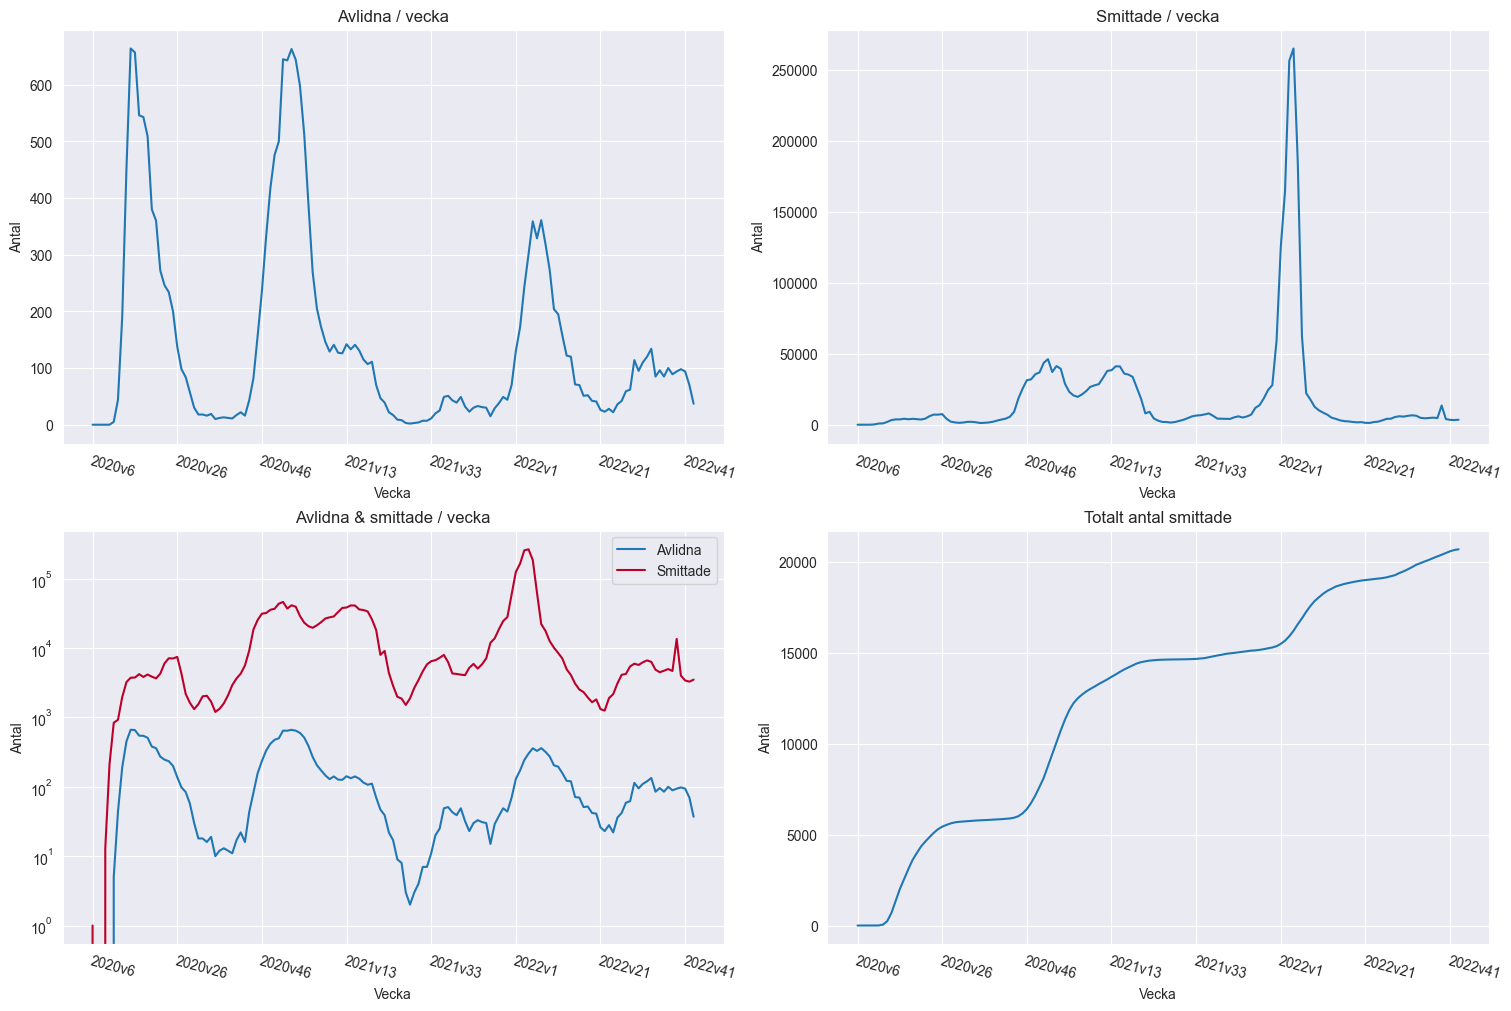

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

griffig, axes = plt.subplots(2,2, figsize = (15, 10), constrained_layout = False) # Create 2x2 grid

# Same figures, but with Seaborn:
sns.lineplot(veckodata, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[0,0])
sns.lineplot(veckodata, x = "Vecka", y = "Antal_fall_vecka", ax = axes[0,1])
sns.lineplot(veckodata, x = "Vecka", y = "Kum_antal_avlidna", ax = axes[1, 1])

# Combine both deceased and registered cases at [1,0]:
sns.lineplot(veckodata, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[1, 0], label = "Avlidna")
sns.lineplot(veckodata, x = "Vecka", y = "Antal_fall_vecka", ax = axes[1, 0], label = "Smittade", color = "#bc0028")

# Change scaling
axes[1, 0].set_yscale("log")

titles = ["Avlidna / vecka", "Smittade / vecka", "Avlidna & smittade / vecka", "Totalt antal smittade"]
y_lables = ["Antal"] * 4

# Formatting by @Andreas-Svensson
for ax, title, y_label in zip(axes.reshape(-1), titles, y_lables):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.xaxis.set_tick_params(rotation=-15) # draws ticks at bottom of x axis with rotation
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor") # anchor left part of label to tick
    sns.set_style("darkgrid")



### <b>Uppgift 2 - uppv√§rmning vaccindata</b>
I uppgifterna nedan ska du anv√§nda dig av datasetet vaccin och bladet Vaccinerade kommun och √•lder. Anv√§nd Plotly express f√∂r att rita diagrammen nedan f√∂r de uppgifter som kr√§ver diagram. Anv√§nd Pandas f√∂r att svara p√• fr√•gor om datasetet.

- a) Hur m√•nga l√§n finns representerade i datasetet?
- b) Hur m√•nga kommuner finns representerade i datasetet?
- c) Hur stor √§r befolkningen som √§r representerad i datasetet?
- d) Ber√§kna hur m√•nga barn under 18 √•r det finns i Sverige baserat p√• det h√§r datasetet. Du f√•r leta upp statistik p√• hur stor totala befolkningen √§r i Sverige.
- e) Rita ett diagram som visar p√• √•ldersf√∂rdelningen av Sveriges befolkning.
- f) Rita stapeldiagram f√∂r andel med minst 1 dos per l√§n, andel tv√• doser per l√§n och andel tre doser per l√§n
- g) Tag V√§stra G√∂talands l√§n och Stockholms l√§n och rita diagram √∂ver andelen vaccinerade med minst 1 dos, tv√• doser, tre doser och fyra doser.

In [112]:
vaccin = pd.read_excel("Data/vaccin.xlsx", sheet_name="Vaccinerade kommun och √•lder") # Create dataframe from xlsx
vaccin.head(1) # Display column names

L√§n        L√§n_namn  Kommun     Kommun_namn  √Ölder  Befolkning  \
0    1  Stockholms l√§n     114  Upplands V√§sby  12-15        2422   

   Antal minst 1 dos  Antal minst 2 doser  Antal 3 doser  Antal 4 doser  \
0               1206                 1046            NaN            NaN   

   Andel minst 1 dos  Andel minst 2 doser  Andel 3 doser  Andel 4 doser  
0           0.497936             0.431874            NaN            NaN

### Uppgift abc)
- Hur m√•nga l√§n finns representerade i datasetet?
- Hur m√•nga kommuner finns representerade i datasetet?
- Hur stor √§r befolkningen som √§r representerad i datasetet?

In [113]:
a2 = len(vaccin["L√§n_namn"].unique()) # Return unique values within "L√§n_namn"
b2 = len(vaccin["Kommun_namn"].unique()) # Return unique values within "Kommun_namn"
c2 = vaccin["Befolkning"].sum() # Sum of "Befolkning"

print(f"Det finns {a2} l√§n och {b2} kommuner. Befolkningsm√§ngden √§r {c2}.")

Det finns 21 l√§n och 290 kommuner. Befolkningsm√§ngden √§r 9092790.


### Uppgift d) TODO ‚ö†Ô∏è
Ber√§kna hur m√•nga barn under 18 √•r det finns i Sverige baserat p√• det h√§r datasetet. Du f√•r leta upp statistik p√• hur stor totala befolkningen √§r i Sverige.


In [114]:
vaccin["√Ölder"][0:3]

0    12-15
1    16-17
2    18-29
Name: √Ölder, dtype: object

In [115]:
vaccin["Befolkning"]

0       2422
1       1203
2       6692
3       7332
4       6946
        ... 
2895    3079
2896    2781
2897    2194
2898    1280
2899     219
Name: Befolkning, Length: 2900, dtype: int64

### Uppgift e)
Rita ett diagram som visar p√• √•ldersf√∂rdelningen av Sveriges befolkning.

In [116]:
# Pie chart with Plotly Express
fig2e_pie = px.pie(data_frame=vaccin, values="Befolkning", names="√Ölder")

fig2e_pie.show()

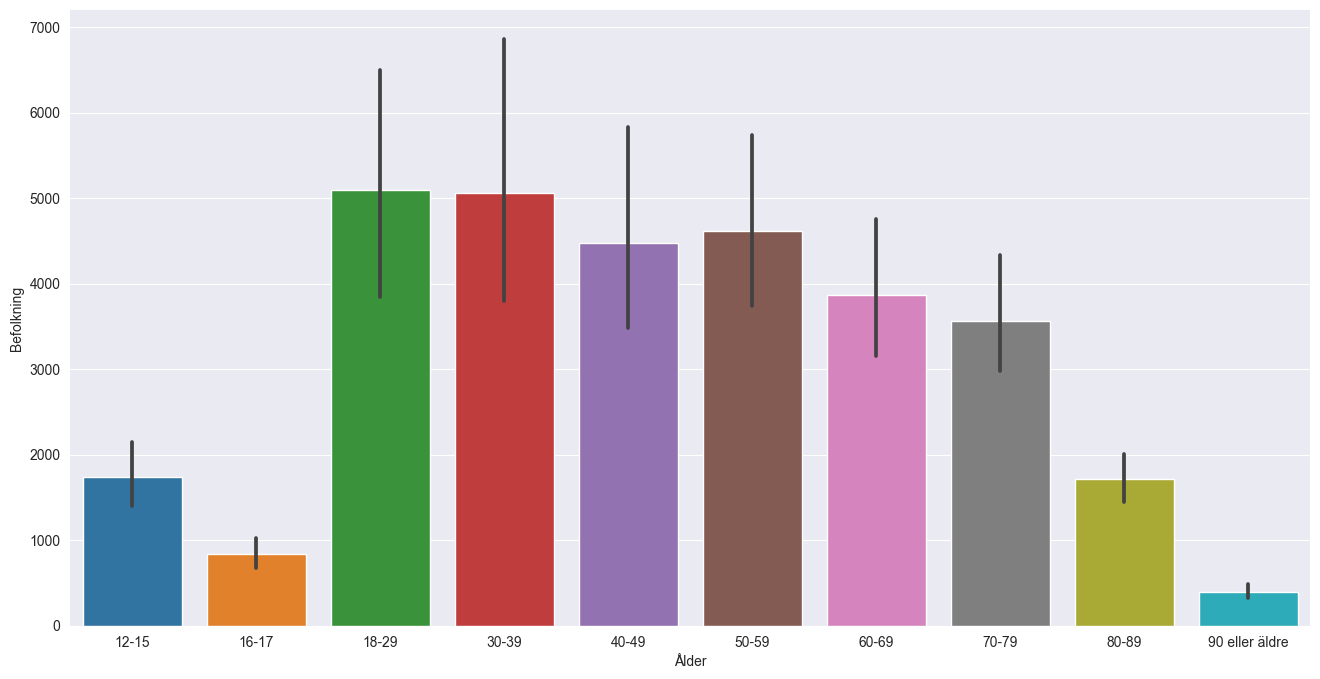

In [154]:
# Single-axis scatter plot (stripplot) with seaborn

plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
fig2e_strip = sns.barplot(data=vaccin, x="√Ölder", y="Befolkning")
sns.despine(top=True, right=True, left=True, bottom=True)


 
 ### Uppgift f)
 Rita stapeldiagram f√∂r andel med minst 1 dos per l√§n, andel tv√• doser per l√§n och andel tre doser per l√§n

In [118]:
befolk, doser = vaccin.groupby("L√§n_namn")["Befolkning"].sum(), vaccin.groupby("L√§n_namn")

# Group province population sum with name of province
dos1 = doser["Antal minst 1 dos"].sum() / befolk
dos2 = doser["Antal minst 2 doser"].sum() / befolk
dos3 = doser["Antal 3 doser"].sum() / befolk

# Function by @Danneftw1
def plotly_bar_plot_with_labels_sublabels (x, y, title, labels, sublabels, file_name_save):
    fig2f = px.bar(
        x=x,
        y=y,
        barmode= 'group', # group bars horizontally
        labels=labels,
        title=title
    )

    newnames = sublabels
    # To be able to change the sub titles for 'Antal doser' without changing the data source,
    # you can switch the legendgroups name with a dict and map it onto existing subtitle names.
    # I had to do this since I couldn't change it through 'labels=' like the other titles
    # source: https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li
    fig2f.for_each_trace(lambda t: t.update(name=newnames[t.name]))

    # Angle province names for readability
    fig2f.update_xaxes(tickangle=40)
    fig2f.show()

labels_ = {"value": "Befolkning",
            "variable": "Vaccin:",
            "x": "L√§n",}

newnames = {"wide_variable_0": "Dos 1",
            "wide_variable_1": "Dos 2",
            "wide_variable_2": "Dos 3",}

plotly_bar_plot_with_labels_sublabels(vaccin.L√§n_namn.unique(), [dos1, dos2, dos3],"Andel vaccinerade per l√§n", labels_, newnames, "Andel_vaccinerade_per_l√§234n")


### Uppgift g)
Tag V√§stra G√∂talands l√§n och Stockholms l√§n och rita diagram √∂ver andelen vaccinerade med minst 1 dos, tv√• doser, tre doser och fyra doser.

In [119]:
#

# Received help from H√•kan in order to group both provinces together to create 4 variables instead of 8
v√§stra_g√∂ta_stockh = vaccin[(vaccin["L√§n_namn"] == "V√§stra G√∂talands l√§n") | (vaccin["L√§n_namn"] == "Stockholms l√§n")]
v√§stra_g√∂ta_stockh_group = v√§stra_g√∂ta_stockh.groupby("L√§n")

# works same as exercise above after grouping
andel_dos1 = v√§stra_g√∂ta_stockh_group["Antal minst 1 dos"].sum() / v√§stra_g√∂ta_stockh_group["Befolkning"].sum()
andel_dos2 = v√§stra_g√∂ta_stockh_group["Antal minst 2 doser"].sum() / v√§stra_g√∂ta_stockh_group["Befolkning"].sum()
andel_dos3 = v√§stra_g√∂ta_stockh_group["Antal 3 doser"].sum() / v√§stra_g√∂ta_stockh_group["Befolkning"].sum()
andel_dos4 = v√§stra_g√∂ta_stockh_group["Antal 4 doser"].sum() / v√§stra_g√∂ta_stockh_group["Befolkning"].sum()

labels_dos ={
            "value": "Befolkning",
            "variable": "Antal doser",
            "x": "Sveriges L√§n",},

sub_labels = {
            "wide_variable_0": "Dos 1",
            "wide_variable_1": "Dos 2",
            "wide_variable_2": "Dos 3",
            "wide_variable_3": "Dos 4"}

plotly_bar_plot_with_labels_sublabels( 
    v√§stra_g√∂ta_stockh.L√§n_namn.unique(),
    [andel_dos1, andel_dos2, andel_dos3, andel_dos4], 
    "Antal vaccinerade / l√§n", 
    labels_dos, sub_labels, 
    "Andel_vaccinerade_vg_sthl.html")

---

### Uppgift 3 - KPIer & explorativ dataanalys
Definiera 3-6 KPIer ut√∂ver de som anv√§nts i ovanst√•ende uppgifter och g√∂r explorativ dataanalys p√• flera sheets p√• b√•da Excel-filerna. Se till att dokumentera vad du unders√∂ker med markdown kombinerad med kod i Jupyter notebook eller om du anv√§nder Pythonskript, skriv en markdown vid sidan om. Dokumentera ocks√• vad du kommer fram till och spara alla visualiseringar.

KPI1: m√§n vs kvinnor something something d√∂dlighet

In [157]:
k√∂n = pd.read_excel("Data/covid19.xlsx", sheet_name="Totalt antal per k√∂n")
k√∂n.head()

K√∂n  Totalt_antal_fall  Totalt_antal_intensivv√•rdade  \
0             Man            1211237                          6579   
1          Kvinna            1383473                          2959   
2  Uppgift saknas              20287                            47   

   Totalt_antal_avlidna  
0                 11331  
1                  9315  
2                   107

In [201]:
totalt_avlida_m√§n, totalt_avlida_kvinnor = k√∂n["Totalt_antal_avlidna"][0], k√∂n["Totalt_antal_avlidna"][1]

foo = totalt_avlida_m√§n / k√∂n["Totalt_antal_fall"][0]
bar = totalt_avlida_kvinnor / k√∂n["Totalt_antal_fall"][1]

print(f"Sannolikhet att avlida som man i covid: {round(foo*100,2)}%")
print(f"Sannolikhet att avlida som kvinna i covid: {round(bar*100,2)}%")

Sannolikhet att avlida som man i covid: 0.94%
Sannolikhet att avlida som kvinna i covid: 0.67%


Slutsats: Sannolikheten att avlida i covid som kvinna √§r l√§gre √§n som man.

# ü§∑‚Äç‚ôÄÔ∏è
---

KPI2: uuuuhhhh antal intensivv√•rdade per dag och antal avlidna per dag

In [217]:
intens = pd.read_excel("Data/covid19.xlsx", sheet_name="Antal intensivv√•rdade per dag")
avlidn = pd.read_excel("Data/covid19.xlsx", sheet_name="Antal avlidna per dag")

fig_intens = px.line(data_frame=intens, x="Datum_v√•rdstart", y="Antal_intensivv√•rdade")
fig_avlidn = px.line(data_frame=avlidn, x="Datum_avliden", y="Antal_avlidna")

# Create figure with secondary y-axis
fig_combin = make_subplots(specs=[[{"secondary_y": True}]])
fig_avlidn.update_traces(yaxis="y2", line_color="#bc0028")
fig_combin.add_traces(fig_intens.data + fig_avlidn.data)

# Title and naming
fig_combin.layout.title = "Antal intensivv√•rdade och antal avlidna"

fig_combin.show()

Slutsast: Intensivv√•rd = üëç<br><br>
V√•rdpersonal:

![](https://i.kym-cdn.com/photos/images/newsfeed/000/184/961/tumblr_lnvvueuSsj1qcj56b.png)
---

In [213]:
fig_avlidn = px.line(data_frame=avlidn, x="Datum_avliden", y="Antal_avlidna")
fig_avlidn.show()

In [120]:
covid_swe = pd.read_excel("Data/covid19.xlsx", sheet_name=None)
vaccine_swe = pd.read_excel("Data/vaccin.xlsx")

covid_swe

{'Antal per dag region':      Statistikdatum  Totalt_antal_fall  Blekinge  Dalarna  Gotland  G√§vleborg  \
 0        2020-02-04                  1         0        0        0          0   
 1        2020-02-05                  0         0        0        0          0   
 2        2020-02-06                  0         0        0        0          0   
 3        2020-02-07                  0         0        0        0          0   
 4        2020-02-08                  0         0        0        0          0   
 ...             ...                ...       ...      ...      ...        ...   
 998      2022-10-29                340         2       18        1          0   
 999      2022-10-30                194         2       18        0          3   
 1000     2022-10-31                468         5       11        0          7   
 1001     2022-11-01                697         3       44        1          8   
 1002     2022-11-02                607        11       41        0      